<a href="https://colab.research.google.com/github/nflorezasu/MAT-421/blob/main/Homework4_NickFlorez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MAT 421 Spring 2022
# Homework 4
# Nick Florez

# Problem 1 

def my_newton(f, df, x0, tol):
# output is an estimation of the root of f
# using the Newton-Raphson method
# recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)


def my_nth_root(x, n, tol):
  f = lambda y: y**n-x
  f_prime = lambda y: n*(y**(n-1))
  r = 1
  #Take my_newton function from pg. 331 of book 
  r = my_newton(f, f_prime, r, tol)
  return r


r = my_nth_root(64, 3, 1e-9)
print("r = ", r)

# r should = 4.0



r =  4.0


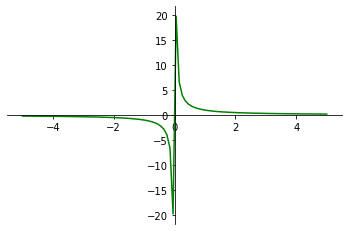

In [ ]:
#Problem 3

import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^3 here
y = 1/x

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

#As depicted by the graph, the function is neither continuous
#nor defined at x = 0. Thus, this violates the intermediate
#value theorem and due to the same reason, the bisection method fails to find 
#the roots of the function f(x) = 1/x

In [25]:
# Problem 4
import numpy as np

def my_bisection(f, a, b, tol):
    #Calculate number of intervals
    n = np.ceil(np.log2((b-a)/tol))
    # initialize zero array of size n
    R = np.zeros(int(n))
    E = np.zeros(int(n))
    #Set the number of iterations(limit) of while loop to n
    limit = n
    i = 0
    def sign(a):
        if(a == 0):
            return a
        return a/abs(a)
        #find the center of the interval and append to R
    while(i < limit):
        R[i] = (a+b)/2
        E[i] = abs(f(R[i]))
        #if the E[i] is below tolerance, update R and E
        if(E[i] < tol):
            R[np.isnan(R)] = []
            E[np.isnan(R)] = []
        elif(sign(f(R[i])) == sign(f(a))):
            a = R[i]
        else:
            b = R[i]
        i += 1
    return [R, E]

f = lambda x: x**2 - 2
[R, E] = my_bisection(f, 0, 2, 1e-1)
print("R = ", R)
print("E = ", E)

f = lambda x: np.sin(x) - np.cos(x)
[R, E] = my_bisection(f, 0, 2, 1e-2)
print("R = ", R)
print("E = ", E)

R =  [1.     1.5    1.25   1.375  1.4375]
E =  [1.         0.25       0.4375     0.109375   0.06640625]
R =  [1.      0.5     0.75    0.875   0.8125  0.78125 0.78125 0.78125]
E =  [0.30116868 0.39815702 0.05005011 0.12654664 0.03832309 0.00586637
 0.00586637 0.00586637]


In [28]:
# Problem 6

import numpy as np
import math

def my_pipe_builder(C_ocean, C_land, L, H):
    p1 = lambda x: math.sqrt(H**2 + x**2)
    p2 = lambda x: L - x
    cost = lambda x: p1(x) * C_ocean + p2(x) * C_land
    error = lambda a,b: cost(a) - cost(b)
    tolerance = 1e-6
    limit = int(np.ceil(np.log2(L/tolerance)))

    i = 1
    a = 0
    b = L
    while (i < limit): 
        m = (a+b)/2
        if (abs(error(a,b)) < tolerance):
            return m
        elif (error(a,b) < 0):
            b = m
        else:
            a = m
        i += 1

print(my_pipe_builder(20, 10, 100, 50))
print(my_pipe_builder(30, 10, 100, 50))

28.86810302734375
17.67730712890625
